# EDA : Loan Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
#Load companies data frame from CSV
df=pd.read_csv('C:/Users/tomarax/Documents/1.LEARN/IIIT-Data Science/Case_Study_2_EDA/loan/loan.csv', low_memory=False)
print("Shape:",df.shape)
df.head()


Shape: (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning and Validation
    1) Removal of ALL Null value Columns
    2) Removal of columns contaning most values as Null
    3) Removal of columns where most values are repetetive ( using describe)
    4) Removal of columns which do not add value to Analysis [based on data dictonary provided]
    5) Removal of rows where values are important columns are NUll
    6) Impute Values if required for few columns
    7) Check for Duplicates

In [2]:
# Part-1 Data Clean 
#There are 111 columns which ofcourse are too much, so we need to extract important columns from the data set
# Drop all such columns where all the rows are Null as these columns would not add any value to analysis
df.dropna(axis=1, how='all',inplace=True) 
print("Shape :", df.shape)   ## Cool, got rid of 54 columns straight away !!!!

Shape : (39717, 57)


In [3]:
#Part -2 Data Clean 
#Identify the columns with large Null Values. 
#Idea is to drop columns where most of the records are Null as such columns would not add any value to analysis
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [4]:
#Based on above outcome, there are still some columns which contain high percentage of Null,so remove such colums
df.drop(['next_pymnt_d', 'mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)
print("Shape :", df.shape)

Shape : (39717, 54)


In [5]:
#Part -3
#Now identify mean, min, SD, 75% etc. of the columns, and if there are no difference in these values then those
#are of no use and we can remove such columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [6]:
#Based on above outcome, few more columns such as tax_liens/delinq_amnt can be dropped as such columns have constance value and 
#would not help in analysis
df.drop(['tax_liens', 'pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code',
         'collections_12_mths_ex_med','collection_recovery_fee','delinq_2yrs','recoveries','inq_last_6mths'], 
        axis=1, inplace=True)

print("Shape :", df.shape)

#Identify the columns with Null Values. 
df.isnull().sum()

Shape : (39717, 43)


id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

In [7]:
#Part 4
#Based on the data dictonary provided, and the columns remaining above, below mentioned columns are the required one
#Basic Idea is, columns which are after effect of loan would not add any value to analysis
reqCols=['id','member_id','issue_d','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_length',
         'home_ownership','annual_inc','loan_status','purpose','addr_state','dti','revol_util','total_acc','total_pymnt'
        ]

df_loan=df[reqCols]
print("Shape :", df_loan.shape)
df_loan.isnull().sum()

Shape : (39717, 19)


id                    0
member_id             0
issue_d               0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
installment           0
grade                 0
emp_length         1075
home_ownership        0
annual_inc            0
loan_status           0
purpose               0
addr_state            0
dti                   0
revol_util           50
total_acc             0
total_pymnt           0
dtype: int64

In [8]:
#df_loan.to_csv('C:/Users/Anshul/Documents/1.LEARN/IIIT-Data Science/Case_study_2_EDA/Exportloan.csv')
#Part -5
#Since Emp length is critical factors, so removing all rows where emp length is Null......
df_loan.dropna(subset=['emp_length'], how='all', inplace = True)
print("Total number of records :", len(df_loan))

Total number of records : 38642


In [9]:
#Part-6
# Revolving utilization is an important column, but not that Critical, so lets find out the and Impute the Values
# To identify mean we need to convert it into numeric, so lets remove % sign from this column
# Remove % ffrom int rate as well to perform analysis
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%','')
df_loan['revol_util'] = df_loan['revol_util'].str.replace('%','')

df_loan["int_rate"] = pd.to_numeric(df_loan["int_rate"])
df_loan["revol_util"] = pd.to_numeric(df_loan["revol_util"])

df_loan.head()

,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,revol_util,total_acc,total_pymnt
0,1077501,1296599,Dec-11,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Fully Paid,credit_card,AZ,27.65,83.7,9,5863.155187
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Charged Off,car,GA,1.00,9.4,4,1008.710000
2,1077175,1313524,Dec-11,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Fully Paid,small_business,IL,8.72,98.5,10,3005.666844
3,1076863,1277178,Dec-11,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Fully Paid,other,CA,20.00,21.0,37,12231.890000
4,1075358,1311748,Dec-11,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Current,other,OR,17.94,53.9,38,3513.330000


In [10]:
print("Mean of Revolving Uti :", df_loan["revol_util"].mean())
print("Median of Revolving Uti :", df_loan["revol_util"].median())

Mean of Revolving Uti : 48.99890788962298
Median of Revolving Uti : 49.5


In [11]:
#Since mean and median are around 49, so lets impute this value in Null revol_util
df_loan["revol_util"].fillna(49, inplace = True) 

print("Total number of records :", len(df_loan))
df_loan.isnull().sum()  # Check for Nulls, should be Zero

Total number of records : 38642


id                 0
member_id          0
issue_d            0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
emp_length         0
home_ownership     0
annual_inc         0
loan_status        0
purpose            0
addr_state         0
dti                0
revol_util         0
total_acc          0
total_pymnt        0
dtype: int64

In [12]:
# Part-7
# Check for Duplicate ID
print("No Dup Id:",sum(df_loan.duplicated(subset = "id")) == 0)
print("No Dup Member Id:",sum(df_loan.duplicated(subset = "member_id")) == 0)

No Dup Id: True
No Dup Member Id: True


# Some Data Manipulations

In [13]:
# Extract Year from Issue_dt column
df_loan['Year']=df_loan['issue_d'].str.split('-',expand=True)[1]
print("Distinct Years", df_loan['Year'].unique())  # Just check for Unique Values: Should be 07,08,09,10,11

Distinct Years ['11' '10' '09' '08' '07']


In [14]:
df_loan['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [15]:
df_loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [16]:
# Remove years from emp length; To have a continous categorical Value
print("Unique:",df_loan['emp_length'].unique())
df_loan["emp_length"] = df_loan["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df_loan["emp_length"] = pd.to_numeric(df_loan["emp_length
                                              
print("Unique:",df_loan['emp_length'].unique())
print("Shape:",df_loan.shape)
df_loan.head()

Unique: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
Unique: [10  1  3  8  9  4  5  6  2  7]
Shape: (38642, 20)


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,revol_util,total_acc,total_pymnt,Year
0,1077501,1296599,Dec-11,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Fully Paid,credit_card,AZ,27.65,83.7,9,5863.155187,11
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,RENT,30000.0,Charged Off,car,GA,1.00,9.4,4,1008.710000,11
2,1077175,1313524,Dec-11,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Fully Paid,small_business,IL,8.72,98.5,10,3005.666844,11
3,1076863,1277178,Dec-11,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Fully Paid,other,CA,20.00,21.0,37,12231.890000,11
4,1075358,1311748,Dec-11,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Current,other,OR,17.94,53.9,38,3513.330000,11


# Basic Analysis

In [17]:
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['loan_status'].values
        
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

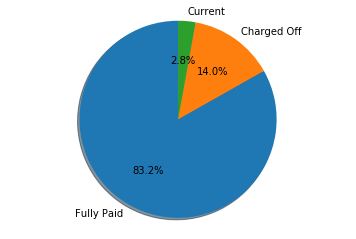

In [18]:
df_loan1= pd.DataFrame(df_loan.loan_status.value_counts())
pie_chart(df_loan1)

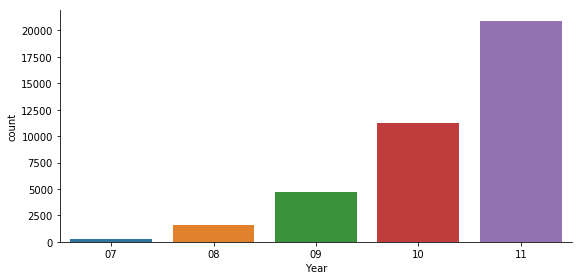

In [19]:
# Plot number of Loans issues per Year in last 5 Years
sns.factorplot(x = "Year", data = df_loan, kind = "count",aspect = 2,legend=True)

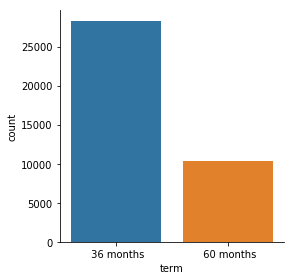

In [106]:
# Plot number of Loans issues as per Term
sns.factorplot(x = "term", data = df_loan, kind = "count",aspect = 1,legend=True)

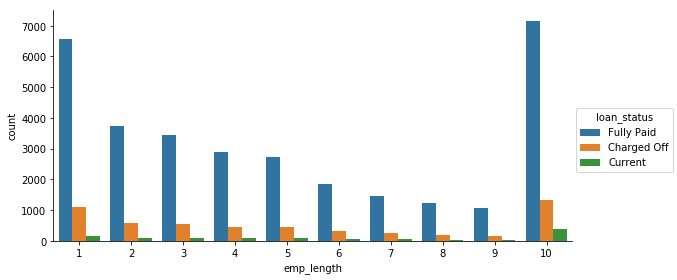

In [31]:
# Bar plot based on Number of Year of Experince
sns.factorplot(x = "emp_length", hue = "loan_status", data = df_loan,kind = "count",aspect = 2,legend=True)

In [21]:
# We Can see from the above Graph that
# 1) People having 10 or more years of expericence defaults the most, but also have Fully Paid the most
# 2) Same Trend is applicable for 1 or less year experince resource as well
# 3) For other Experience, its pretty widely spread out
# 4) Let's Prepare an Employment Experince Group and Identify something

In [22]:
#Dervie Employment Category from the data using the function below::
def exp_cat(x):
    if x<=3:
        return 'LowExperince'
    elif x>3 and x<=8:
        return "AvgExperience"
    elif x>8:
        return 'Experienced'
    else:
        return 'Others'
df_loan['EmpCat']=df_loan['emp_length'].apply(exp_cat)
print("Unique Experience Group :", df_loan['EmpCat'].unique())
df_loan.head()

Unique Experience Group : ['Experienced' 'LowExperince' 'AvgExperience']


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,annual_inc,loan_status,purpose,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat
0,1077501,1296599,Dec-11,5000,4975.0,36 months,10.65,162.87,B,10,...,24000.0,Fully Paid,credit_card,AZ,27.65,83.7,9,5863.155187,11,Experienced
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,...,30000.0,Charged Off,car,GA,1.00,9.4,4,1008.710000,11,LowExperince
2,1077175,1313524,Dec-11,2400,2400.0,36 months,15.96,84.33,C,10,...,12252.0,Fully Paid,small_business,IL,8.72,98.5,10,3005.666844,11,Experienced
3,1076863,1277178,Dec-11,10000,10000.0,36 months,13.49,339.31,C,10,...,49200.0,Fully Paid,other,CA,20.00,21.0,37,12231.890000,11,Experienced
4,1075358,1311748,Dec-11,3000,3000.0,60 months,12.69,67.79,B,1,...,80000.0,Current,other,OR,17.94,53.9,38,3513.330000,11,LowExperince


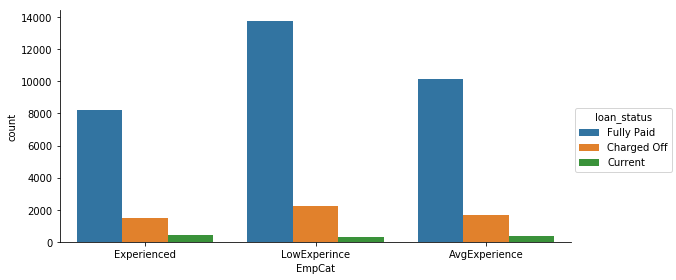

In [23]:
sns.factorplot(x = "EmpCat", hue = "loan_status", data = df_loan, kind = "count",aspect = 2,legend=True)
# This below Graph Doesnt Help much, so we shall go with 10 and 1 year experince Folks.

# Derive Some Columns using existing COlumns

In [24]:
df_loan['addr_state'].unique() # Identify Unique States

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [25]:
# Make a list with each of the regions by state.
# Divide the states into different regions using below link
#https://www.worldatlas.com/articles/the-regions-of-the-united-states.html

west = ['CA','CO','OR','UT','WA','NV','MT', 'HI', 'WY', 'ID']
south_east = ['AK','GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
south_west = ['AZ', 'NM', 'TX', 'OK']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def dregions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    else:
        return 'Other'
    
df_loan['region'] = df_loan['addr_state'].apply(dregions)
print("Unique Regions :",df_loan['region'].unique())
df_loan.head()

Unique Regions : ['SouthWest' 'SouthEast' 'MidWest' 'West' 'NorthEast']


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat,region
0,1077501,1296599,Dec-11,5000,4975.0,36 months,10.65,162.87,B,10,...,Fully Paid,credit_card,AZ,27.65,83.7,9,5863.155187,11,Experienced,SouthWest
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,...,Charged Off,car,GA,1.00,9.4,4,1008.710000,11,LowExperince,SouthEast
2,1077175,1313524,Dec-11,2400,2400.0,36 months,15.96,84.33,C,10,...,Fully Paid,small_business,IL,8.72,98.5,10,3005.666844,11,Experienced,MidWest
3,1076863,1277178,Dec-11,10000,10000.0,36 months,13.49,339.31,C,10,...,Fully Paid,other,CA,20.00,21.0,37,12231.890000,11,Experienced,West
4,1075358,1311748,Dec-11,3000,3000.0,60 months,12.69,67.79,B,1,...,Current,other,OR,17.94,53.9,38,3513.330000,11,LowExperince,West


In [26]:
#Dervice Income Group from the data using the function below::
def inc_grp(x):
    if x<=40000:
        return 'LowIncome'
    elif x>40000 and x<=75000:
        return "AverageIncome"
    elif x>75000 and x<=100000:
        return "GoodIncome"
    elif x>100000 and x<=150000:
        return 'HighIncome'
    elif x>150000:
        return 'VeryHigh'
    else:
        return 'Others'
df_loan['IncomeGrp']=df_loan['annual_inc'].apply(inc_grp)
print("Unique Income Groups :",df_loan['IncomeGrp'].unique())
df_loan.head()

Unique Income Groups : ['LowIncome' 'AverageIncome' 'GoodIncome' 'HighIncome' 'VeryHigh']


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat,region,IncomeGrp
0,1077501,1296599,Dec-11,5000,4975.0,36 months,10.65,162.87,B,10,...,credit_card,AZ,27.65,83.7,9,5863.155187,11,Experienced,SouthWest,LowIncome
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,...,car,GA,1.00,9.4,4,1008.710000,11,LowExperince,SouthEast,LowIncome
2,1077175,1313524,Dec-11,2400,2400.0,36 months,15.96,84.33,C,10,...,small_business,IL,8.72,98.5,10,3005.666844,11,Experienced,MidWest,LowIncome
3,1076863,1277178,Dec-11,10000,10000.0,36 months,13.49,339.31,C,10,...,other,CA,20.00,21.0,37,12231.890000,11,Experienced,West,AverageIncome
4,1075358,1311748,Dec-11,3000,3000.0,60 months,12.69,67.79,B,1,...,other,OR,17.94,53.9,38,3513.330000,11,LowExperince,West,GoodIncome


In [27]:
#Identify the loands based on Derived Income group
#sns.factorplot(x = "IncomeGrp", hue = "loan_status", data = df_loan, kind = "count",aspect = 3,legend=True)

In [28]:
#df_loan.pivot_table(index =['emp_length'], columns='loan_status', values="funded_amnt",aggfunc='sum').div(1000000)

In [33]:
## I am not sure about this
def loan_cat(x):
    if x<=2000:
        return 'LowImpact'
    elif x>2000 and x<=5000:
        return "MediumImpact"
    elif x>5000 and x<=15000:
        return "HighImpact"
    elif x>15000:
        return 'SevereImpact'
    else:
        return 'Others'
df_loan['LoanImpact']=df_loan['funded_amnt'].apply(loan_cat)
df_loan.head()
a=df_loan.loc[(df_loan["LoanImpact"]=="SevereImpact")]

a.pivot_table(index =['emp_length'], columns='loan_status', values="funded_amnt",aggfunc='sum')

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1,4693225,1229300,21296600
2,2545500,1050775,12954675
3,2799200,819925,13171500
4,2512475,1016950,11709425
5,2758750,1161300,11738350
6,1930425,601700,8559150
7,1701050,681875,6948075
8,1425525,435625,6096650
9,1023700,290200,5443950


In [34]:
x1=df_loan.loc[(df_loan["loan_status"] == "Fully Paid")].id.count().astype(int)
print("Count of Fully Paid",x1)
y1=df_loan.loc[(df_loan["loan_status"] == "Charged Off")].id.count().astype(int)
print("Count of Charged Off",y1)

Count of Fully Paid 32145
Count of Charged Off 5399


# Univariate Analysis

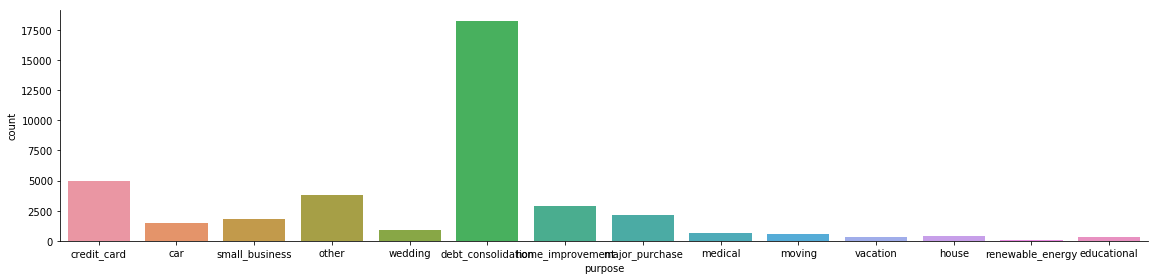

In [43]:
# Overall Distribution of Purpose ( Loan Type)
sns.factorplot(x = "purpose", data = df_loan, kind = "count",aspect = 4,legend=True)

In [36]:
#Evident from the graph that debt consolidation/other/credit card/home improvement/small business are common purpose
# Debt Consolidation stands out.....

## Now Prepare the code to identify the percentage of each category within Charged of and Not Charged off Loan
purpose=df_loan.pivot_table(index ='purpose', columns='loan_status', values="id",aggfunc='count')
purpose.reset_index(inplace=True)

# Calculate the overall percent for each type of loan
purpose["ChargedOff_%"]=(purpose["Charged Off"]/y1)*100
purpose["FullyPaid_%"]=(purpose["Fully Paid"]/x1)*100

#RATIO -- Within same Vertical
purpose["ChargedOff_r"]=(purpose["Charged Off"]/(purpose["Charged Off"]+purpose["Fully Paid"]))*100
purpose["FullyPaid_r"]=(purpose["Fully Paid"]/(purpose["Charged Off"]+purpose["Fully Paid"]))*100

Text(0.5,1,'Ratio View (Within the Purpose)')

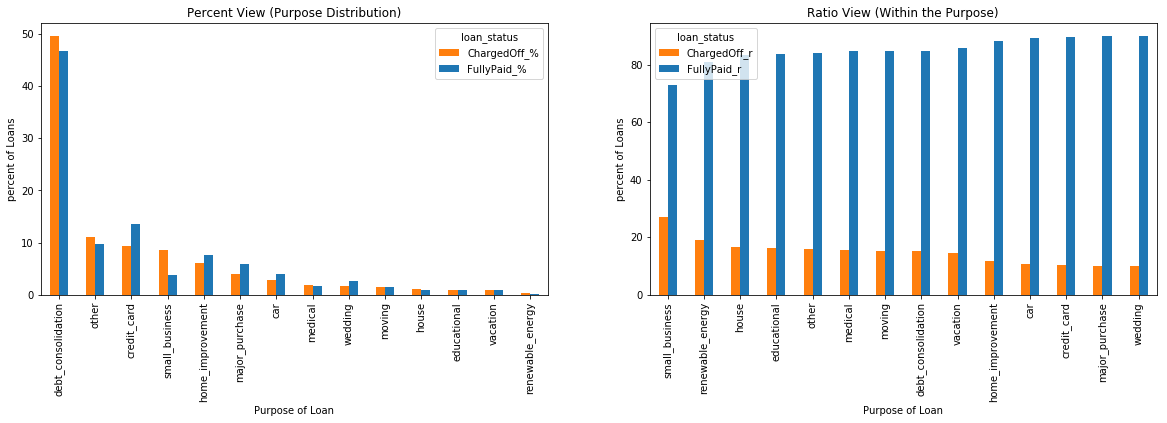

In [39]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(20,5))
fig.tight_layout()

gh1 = fig.add_subplot(121)
purpose.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="purpose", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('Purpose of Loan')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View (Purpose Distribution)')

gh2 = fig.add_subplot(122)
purpose.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="purpose", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('Purpose of Loan')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View (Within the Purpose)')

In [44]:
# Based on the above Graphs, it is evident that :
# 1) Around 50% of Charged Off Loans are under "Debt Consolidation"
# 2) Within a particular purpose, "Small Business" has the highest ratio of Default
# 3) "Credit Card" is the third purpose which is popular and has some defualts
# Conclusion is, These are the top THREE purposes which can be used for Bivariate Analysis

In [45]:
home=df_loan.pivot_table(index ='home_ownership', columns='loan_status', values="id",aggfunc='count')
home.reset_index(inplace=True)

# Calculate the overall percent for each type of loan
home["ChargedOff_%"]=(home["Charged Off"]/y1)*100
home["FullyPaid_%"]=(home["Fully Paid"]/x1)*100

#RATIO -- Within same Vertical
home["ChargedOff_r"]=(home["Charged Off"]/(home["Charged Off"]+home["Fully Paid"]))*100
home["FullyPaid_r"]=(home["Fully Paid"]/(home["Charged Off"]+home["Fully Paid"]))*100

Text(0.5,1,'Ratio View (Within the Ownership)')

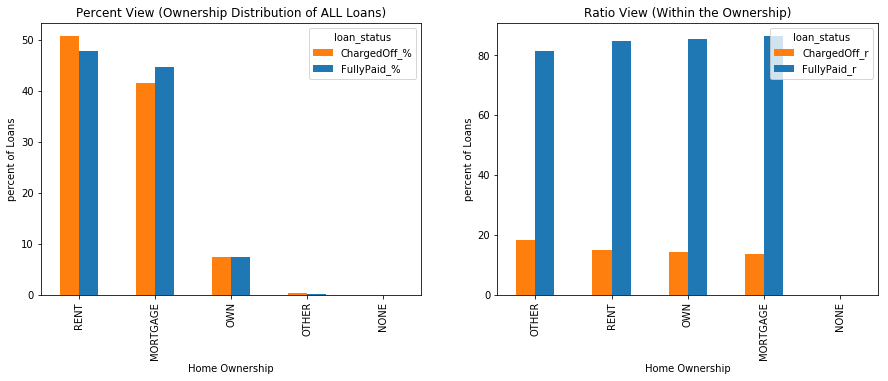

In [47]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

gh1 = fig.add_subplot(121)
home.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="home_ownership", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('Home Ownership')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View (Ownership Distribution of ALL Loans)')

gh2 = fig.add_subplot(122)
home.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="home_ownership", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('Home Ownership')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View (Within the Ownership)')

In [48]:
# People on Rent and Mortgage take the highest number of loans, and obviously are the ones who defaults
# We can consider RENT and MORTAGE type Ownership for Bivariate...

In [49]:
# Now Just Like ABove, Perform Univariate Analysis on
# 1) Employment Lenght, 
# 2) Loan Grade
# 3) Income Group
# 4) Region 
# 5) Loan Term
#--------------------------------------------------------------------------------------------------
emplen=df_loan.pivot_table(index ='emp_length', columns='loan_status', values="id",aggfunc='count')
emplen.reset_index(inplace=True)
emplen["ChargedOff_%"]=(emplen["Charged Off"]/y1)*100
emplen["FullyPaid_%"]=(emplen["Fully Paid"]/x1)*100
emplen["ChargedOff_r"]=(emplen["Charged Off"]/(emplen["Charged Off"]+emplen["Fully Paid"]))*100
emplen["FullyPaid_r"]=(emplen["Fully Paid"]/(emplen["Charged Off"]+emplen["Fully Paid"]))*100

grade=df_loan.pivot_table(index ='grade', columns='loan_status', values="id",aggfunc='count')
grade.reset_index(inplace=True)
grade["ChargedOff_%"]=(grade["Charged Off"]/y1)*100
grade["FullyPaid_%"]=(grade["Fully Paid"]/x1)*100
grade["ChargedOff_r"]=(grade["Charged Off"]/(grade["Charged Off"]+grade["Fully Paid"]))*100
grade["FullyPaid_r"]=(grade["Fully Paid"]/(grade["Charged Off"]+grade["Fully Paid"]))*100

income=df_loan.pivot_table(index ='IncomeGrp', columns='loan_status', values="id",aggfunc='count')
income.reset_index(inplace=True)
income["ChargedOff_%"]=(income["Charged Off"]/y1)*100
income["FullyPaid_%"]=(income["Fully Paid"]/x1)*100
income["ChargedOff_r"]=(income["Charged Off"]/(income["Charged Off"]+income["Fully Paid"]))*100
income["FullyPaid_r"]=(income["Fully Paid"]/(income["Charged Off"]+income["Fully Paid"]))*100

region=df_loan.pivot_table(index ='region', columns='loan_status', values="id",aggfunc='count')
region.reset_index(inplace=True)
region["ChargedOff_%"]=(region["Charged Off"]/y1)*100
region["FullyPaid_%"]=(region["Fully Paid"]/x1)*100
region["ChargedOff_r"]=(region["Charged Off"]/(region["Charged Off"]+region["Fully Paid"]))*100
region["FullyPaid_r"]=(region["Fully Paid"]/(region["Charged Off"]+region["Fully Paid"]))*100

term=df_loan.pivot_table(index ='term', columns='loan_status', values="id",aggfunc='count')
term.reset_index(inplace=True)
term["ChargedOff_%"]=(term["Charged Off"]/y1)*100
term["FullyPaid_%"]=(term["Fully Paid"]/x1)*100
term["ChargedOff_r"]=(term["Charged Off"]/(term["Charged Off"]+term["Fully Paid"]))*100
term["FullyPaid_r"]=(term["Fully Paid"]/(term["Charged Off"]+term["Fully Paid"]))*100

Text(0.5,1,'Ratio View')

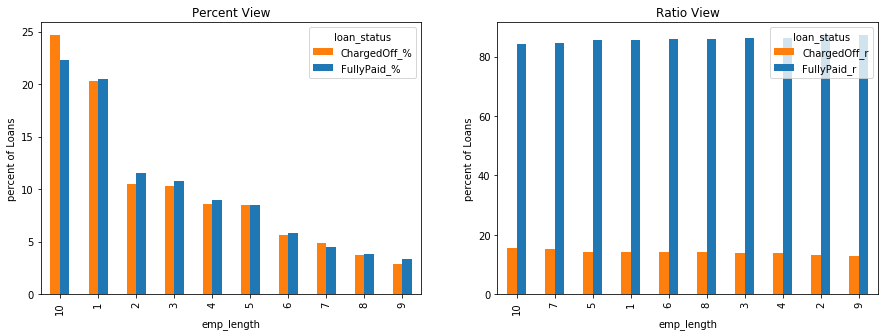

In [50]:
# Now Draw the graph of above created Data
# Employment Lenght View
fig = plt.figure(figsize=(15,5))

gh1 = fig.add_subplot(121)
emplen.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="emp_length", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('emp_length')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View')

gh2 = fig.add_subplot(122)
emplen.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="emp_length", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('emp_length')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View')

Text(0.5,1,'Ratio View (Within the Grade)')

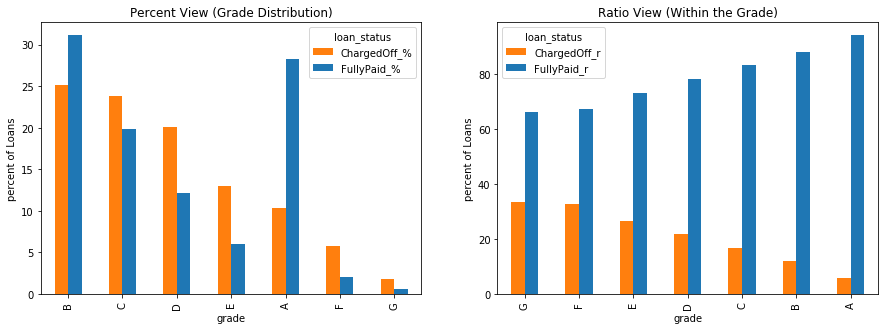

In [52]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(15,5))

gh1 = fig.add_subplot(121)
grade.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="grade", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('grade')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View (Grade Distribution)')

gh2 = fig.add_subplot(122)
grade.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="grade", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('grade')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View (Within the Grade)')

Text(0.5,1,'Ratio View')

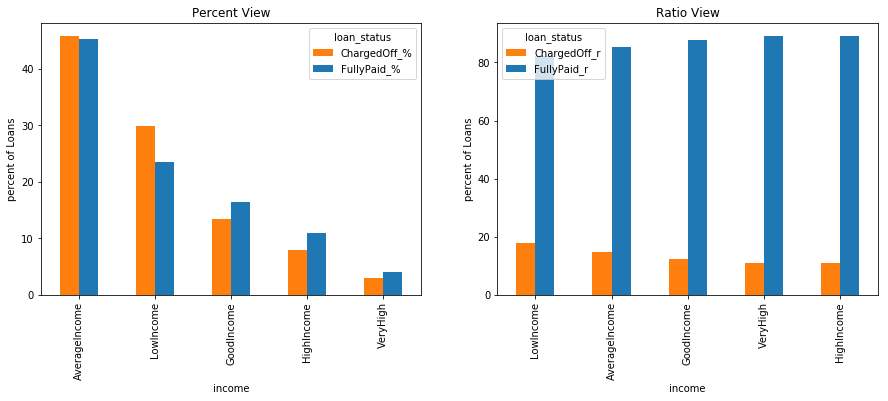

In [53]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(15,5))

gh1 = fig.add_subplot(121)
income.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="IncomeGrp", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('income')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View')

gh2 = fig.add_subplot(122)
income.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="IncomeGrp", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('income')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View')

Text(0.5,1,'Ratio View')

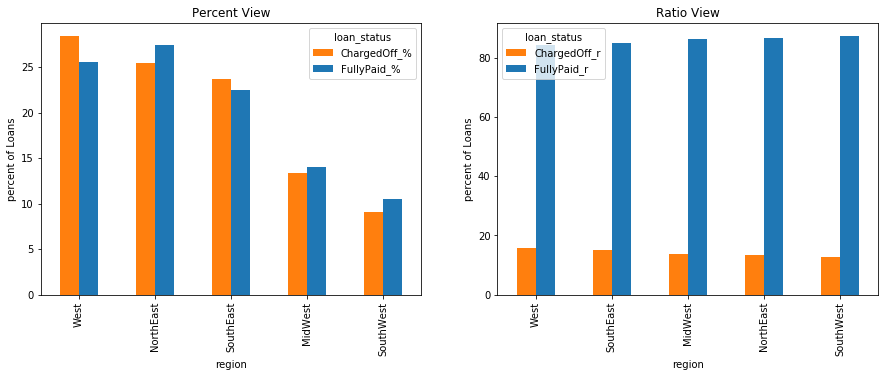

In [54]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(15,5))

gh1 = fig.add_subplot(121)
region.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="region", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('region')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View')

gh2 = fig.add_subplot(122)
region.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="region", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('region')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View')

Text(0.5,1,'Ratio View')

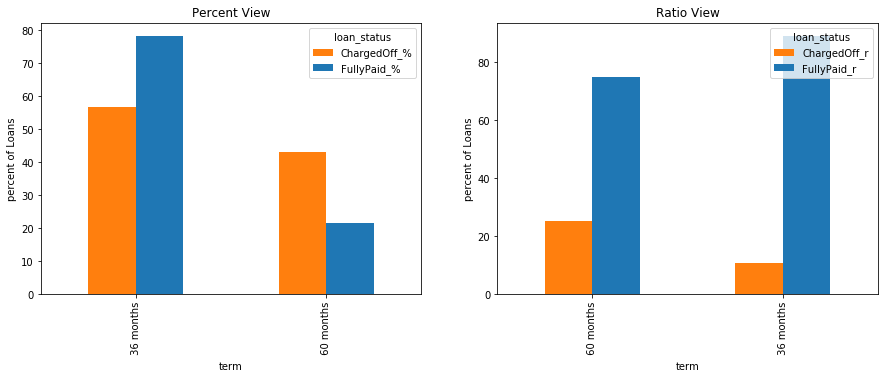

In [55]:
# Now Draw the graph of above created Data
fig = plt.figure(figsize=(15,5))

gh1 = fig.add_subplot(121)
term.sort_values("ChargedOff_%", ascending=False).plot(ax=gh1,x="term", y=["ChargedOff_%", "FullyPaid_%"], 
                                                          kind="bar",color=['C1','C0'])
gh1.set_xlabel('term')
gh1.set_ylabel('percent of Loans')
gh1.set_title('Percent View')

gh2 = fig.add_subplot(122)
term.sort_values("ChargedOff_r", ascending=False).plot(ax=gh2, x="term", y=["ChargedOff_r", "FullyPaid_r"],
                                                          kind="bar",color=['C1','C0'],)
gh2.set_xlabel('term')
gh2.set_ylabel('percent of Loans')
gh2.set_title('Ratio View')

# Conclusion of Univariate Analysis
    Home Ownership : Most of the Loans are issued to Rent and Mortgage People
    Purpose : Debt consolidation, credit card and Small Business are most problematic loan purpose
    Grade : Loan Grade B, C, D seemed to be problematics using Univariate
    Income : Average Income and Low Income within Income Group seems to Default more loans
    Term : 60 month term looks to be more problematic
    Emp Lenth : 10 or more Years of experinced folks seems to be defaulting More

# Bivariate Analysis :
        

In [104]:
a=df_loan.loc[(df_loan["loan_status"] != "Current") 
              & (df_loan["purpose"].isin(['debt_consolidation','credit_card','small_business']))]
a.pivot_table(index =['grade','term'], columns='loan_status', values="id",aggfunc='count')

loan_status       Charged Off  Fully Paid
grade term                               
A      36 months          306        4935
       60 months           19         167
B      36 months          584        5409
       60 months          281        1105
C      36 months          514        3219
       60 months          330        1034
D      36 months          387        1847
       60 months          372         892
E      36 months          121         509
       60 months          405         881
F      36 months           42         114
       60 months          211         363
G      36 months           17          31
       60 months           62         127

In [90]:
df_def_purpose=df_loan.loc[(df_loan["loan_status"] == "Charged Off") &
                           (df_loan["purpose"].isin(['debt_consolidation','credit_card','small_business']))
                          ]
print("Total:",len(df_def_purpose))
df_def_purpose.head()


Total: 3651


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat,region,IncomeGrp,LoanImpact
8,1071795,1306957,Dec-11,5600,5600.0,60 months,21.28,152.39,F,4,...,CA,5.55,32.6,13,646.02,11,AvgExperience,West,LowIncome,HighImpact
12,1064687,1298717,Dec-11,9000,9000.0,36 months,13.49,305.38,C,1,...,VA,10.08,91.7,9,2270.70,11,LowExperince,SouthEast,LowIncome,HighImpact
21,1039153,1269083,Dec-11,21000,21000.0,36 months,12.42,701.73,B,10,...,FL,13.22,90.3,38,14025.40,11,Experienced,SouthEast,HighIncome,SevereImpact
26,1069800,1304679,Dec-11,15000,8725.0,36 months,14.27,514.64,C,9,...,NY,15.22,57.6,11,0.00,11,Experienced,NorthEast,AverageIncome,HighImpact
46,1069465,1304521,Dec-11,5000,5000.0,36 months,8.90,158.77,A,10,...,OH,16.33,62.1,35,5021.37,11,Experienced,MidWest,GoodIncome,MediumImpact


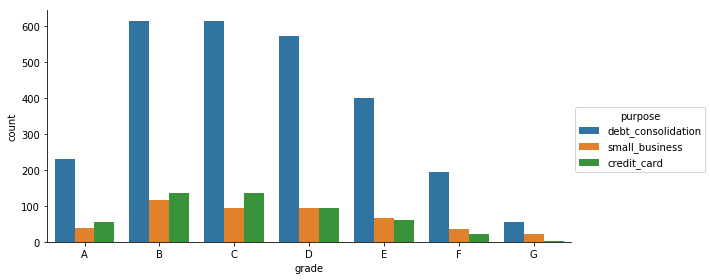

In [80]:
sns.factorplot(x = "grade", hue="purpose", data = df_def_purpose.sort_values("grade"), 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

# Below Graph confirms that B,C, D grades are the most risky one.

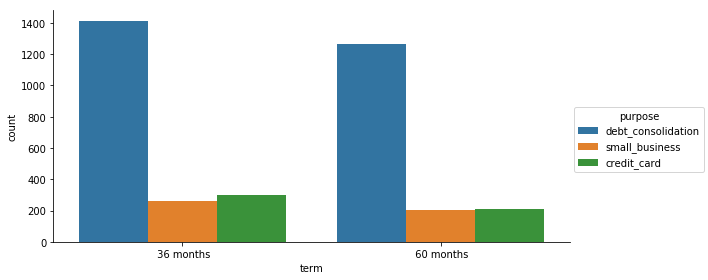

In [81]:
sns.factorplot(x = "term", hue="purpose", data = df_def_purpose.sort_values("grade"), 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

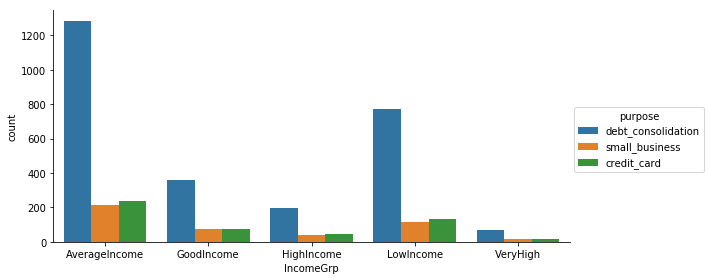

In [87]:
sns.factorplot(x = "IncomeGrp", hue="purpose", data = df_def_purpose.sort_values("IncomeGrp"), 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

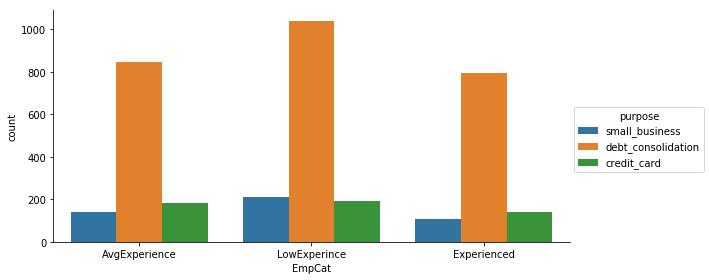

In [88]:
sns.factorplot(x = "EmpCat", hue="purpose", data = df_def_purpose, 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

In [91]:
# Now check based on the B C and D Grade as these seemed to be problamatic Grades
df_def_grade=df_loan.loc[(df_loan["loan_status"] == "Charged Off") &
                           (df_loan["grade"].isin(['B','C','D']))
                          ]
print("Total:",len(df_def_grade))
df_def_grade.head()

Total: 3728


,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat,region,IncomeGrp,LoanImpact
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,...,GA,1.00,9.4,4,1008.71,11,LowExperince,SouthEast,LowIncome,MediumImpact
9,1071570,1306721,Dec-11,5375,5350.0,60 months,12.69,121.45,B,1,...,TX,18.08,36.5,3,1476.19,11,LowExperince,SouthWest,LowIncome,HighImpact
12,1064687,1298717,Dec-11,9000,9000.0,36 months,13.49,305.38,C,1,...,VA,10.08,91.7,9,2270.70,11,LowExperince,SouthEast,LowIncome,HighImpact
14,1069057,1303503,Dec-11,10000,10000.0,36 months,10.65,325.74,B,3,...,CA,7.06,55.5,29,7471.99,11,LowExperince,West,GoodIncome,HighImpact
21,1039153,1269083,Dec-11,21000,21000.0,36 months,12.42,701.73,B,10,...,FL,13.22,90.3,38,14025.40,11,Experienced,SouthEast,HighIncome,SevereImpact


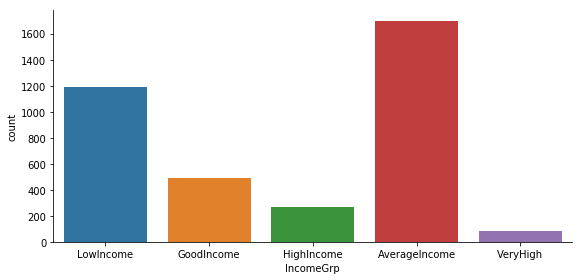

In [95]:
sns.factorplot(x = "IncomeGrp", data = df_def_grade, 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

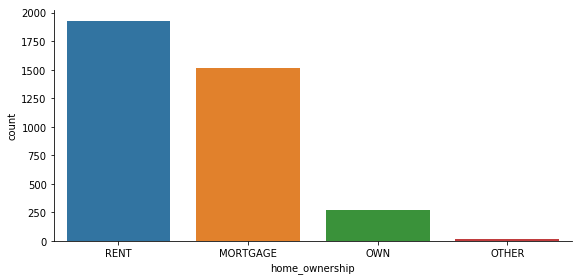

In [96]:
sns.factorplot(x = "home_ownership", data = df_def_grade, 
               kind = "count",aspect = 2,legend=True).set_titles="VIEW"

# Now do some Analysis on Numerical Values i.e. for DTI, Revolving Utilization, and Funded Amount

In [56]:
#Prepare a New Data Frame containing only Default Loans
df_default = df_loan[df_loan.loan_status == "Charged Off"]
print("Total Charged Off Loans : ", len(df_default))

Total Charged Off Loans :  5399


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C193DCDD8>]],
      dtype=object)

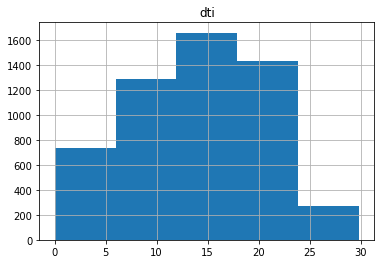

In [57]:
df_default.hist(column="dti",bins=5)  # Likelihood of default is from 12-20% DTI

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C19402AC8>]],
      dtype=object)

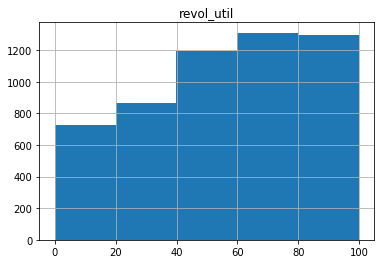

In [58]:
df_default.hist(column="revol_util",bins=5)  # Likelihood of default is from >40

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C19445438>]],
      dtype=object)

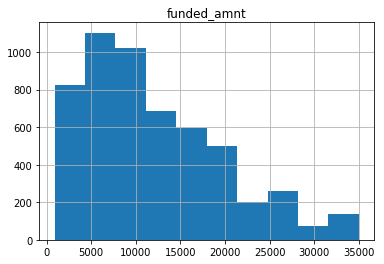

In [59]:
df_default.hist(column="funded_amnt",bins=10)  # Likelihood of default is from 4000 to 14000

# BIVARIATE Analysis on DTI, Revolving Utilization, and Funded Amount

In [63]:
#Based on the above 3 histograms, below is 

df_bivar= df_default.loc[(df_default["dti"] >= 10) & (df_default["dti"] <=20) 
                         & (df_default["funded_amnt"] >=4000) & (df_default["funded_amnt"] <=15000)
                         & (df_default["revol_util"] >=40)
                         ]

In [64]:
len(df_bivar) # Around 20% of Default Loans fall under these three values....

1187

In [62]:
df_default.head()

,id,member_id,issue_d,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,addr_state,dti,revol_util,total_acc,total_pymnt,Year,EmpCat,region,IncomeGrp,LoanImpact
1,1077430,1314167,Dec-11,2500,2500.0,60 months,15.27,59.83,C,1,...,GA,1.00,9.4,4,1008.71,11,LowExperince,SouthEast,LowIncome,MediumImpact
8,1071795,1306957,Dec-11,5600,5600.0,60 months,21.28,152.39,F,4,...,CA,5.55,32.6,13,646.02,11,AvgExperience,West,LowIncome,HighImpact
9,1071570,1306721,Dec-11,5375,5350.0,60 months,12.69,121.45,B,1,...,TX,18.08,36.5,3,1476.19,11,LowExperince,SouthWest,LowIncome,HighImpact
12,1064687,1298717,Dec-11,9000,9000.0,36 months,13.49,305.38,C,1,...,VA,10.08,91.7,9,2270.70,11,LowExperince,SouthEast,LowIncome,HighImpact
14,1069057,1303503,Dec-11,10000,10000.0,36 months,10.65,325.74,B,3,...,CA,7.06,55.5,29,7471.99,11,LowExperince,West,GoodIncome,HighImpact


# Correlation

In [98]:
#Now lets try to Identify the Correlation among multiple values
#-----------------------------------------------------------------
features = ['grade','funded_amnt','int_rate','emp_length','home_ownership','annual_inc','loan_status','dti','revol_util']
df2=df_loan[features]
df2.head()


def f_loan(x):
    if x =='Charged Off':
        return 1
    else:
        return 0
df2['status']=df_loan['loan_status'].apply(f_loan)
df2.head()

#Coverting Categorical Values into Continous Categorical Values for Correlation
df2['grade'] = df2['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df2["home_ownership"] = df2["home_ownership"].map({"OWN":4,"MORTGAGE":3,"RENT":2,"OTHER":1,"NONE":1})
print("Shape:",df2.shape)
df2.head()

Shape: (38642, 10)


,grade,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,loan_status,dti,revol_util,status
0,6,5000,10.65,10,2,24000.0,Fully Paid,27.65,83.7,0
1,5,2500,15.27,1,2,30000.0,Charged Off,1.00,9.4,1
2,5,2400,15.96,10,2,12252.0,Fully Paid,8.72,98.5,0
3,5,10000,13.49,10,2,49200.0,Fully Paid,20.00,21.0,0
4,6,3000,12.69,1,2,80000.0,Current,17.94,53.9,0


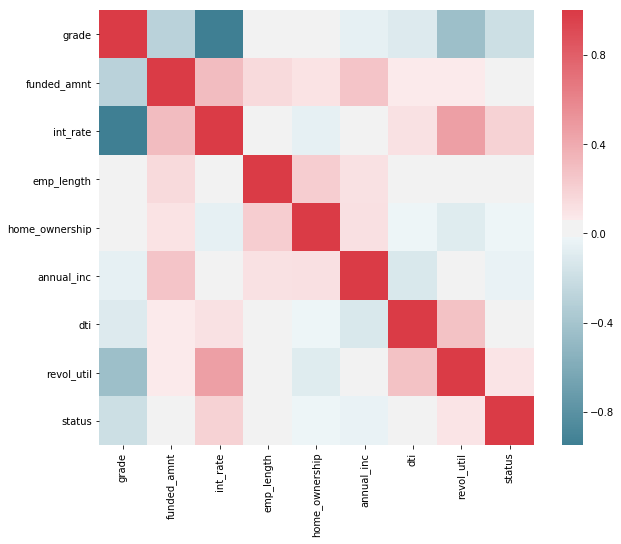

In [107]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Correlation Ends
#-----------------------------------------------------------------

In [109]:
#Now lets try to Identify the Correlation among multiple values
#-----------------------------------------------------------------
features = ['grade','funded_amnt','int_rate','emp_length','home_ownership','annual_inc','dti','revol_util']
df3=df_default[features]

#Coverting Categorical Values into Continous Categorical Values for Correlation
df3['grade'] = df3['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df3["home_ownership"] = df3["home_ownership"].map({"OWN":4,"MORTGAGE":3,"RENT":2,"OTHER":1,"NONE":1})
print("Shape:",df3.shape)
df3.head()

Shape: (5399, 8)


,grade,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_util
1,5,2500,15.27,1,2,30000.0,1.00,9.4
8,2,5600,21.28,4,4,40000.0,5.55,32.6
9,6,5375,12.69,1,2,15000.0,18.08,36.5
12,5,9000,13.49,1,2,30000.0,10.08,91.7
14,6,10000,10.65,3,2,100000.0,7.06,55.5


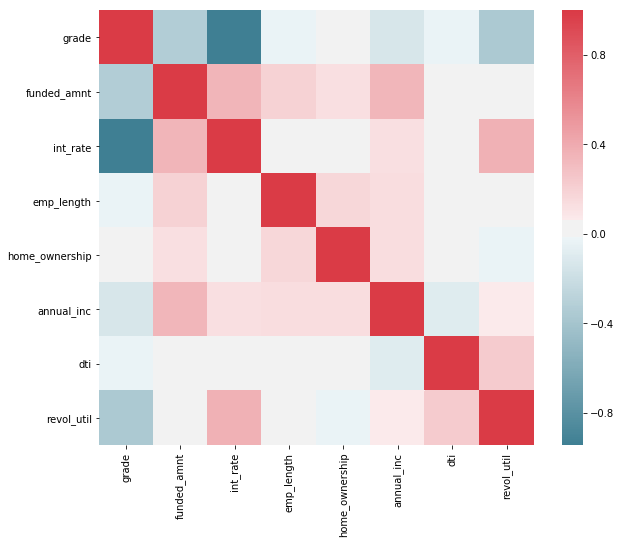

In [110]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [111]:
corr

,grade,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_util
grade,1.000000,-0.321857,-0.944667,-0.026074,0.001714,-0.135135,-0.025530,-0.363522
funded_amnt,-0.321857,1.000000,0.347489,0.195099,0.130190,0.342506,0.061853,0.044656
int_rate,-0.944667,0.347489,1.000000,0.041043,-0.004504,0.126876,0.044896,0.376030
emp_length,-0.026074,0.195099,0.041043,1.000000,0.171102,0.134728,0.056225,0.036869
home_ownership,0.001714,0.130190,-0.004504,0.171102,1.000000,0.137428,0.017104,-0.029977
annual_inc,-0.135135,0.342506,0.126876,0.134728,0.137428,1.000000,-0.089257,0.068324
dti,-0.025530,0.061853,0.044896,0.056225,0.017104,-0.089257,1.000000,0.227638
revol_util,-0.363522,0.044656,0.376030,0.036869,-0.029977,0.068324,0.227638,1.000000
